# Trend Analysis using Google Trends and Analytics

In [1]:
#importing required packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import tweepy

In [2]:
#Intializing Google Trend Request
pytrends = TrendReq(hl='en-US', tz=360)

In [15]:
#Inputing the required keywords (in our case we will be going with fashion related keywords)
kw_list = ["jeans", "khakis", "sweaters", "fashion accessories","fashion"]

In [16]:
#fetching the payload
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='US', gprop='')

In [5]:
trends_data = pytrends.interest_over_time().reset_index()

In [6]:
type(trends_data)

pandas.core.frame.DataFrame

In [7]:
trends_data.dtypes

date                   datetime64[ns]
jeans                           int32
khakis                          int32
sweaters                        int32
fashion accessories             int32
fashion                         int32
isPartial                        bool
dtype: object

In [27]:
trends_data.head()

,date,jeans,khakis,sweaters,fashion accessories,isPartial
0,2023-09-24,72,1,7,0,False
1,2023-10-01,71,1,7,0,False
2,2023-10-08,77,1,9,0,False
3,2023-10-15,79,1,10,0,False
4,2023-10-22,72,1,9,0,False


In [79]:
print(f"The min date value in data is: {trends_data['date'].min()}")
print(f"The max date value in data is: {trends_data['date'].max()}")

The min date value in data is: 2023-09-24 00:00:00
The max date value in data is: 2024-09-29 00:00:00


In [80]:
trends_data.shape

(54, 7)

## Search Frequency of Items Over Time

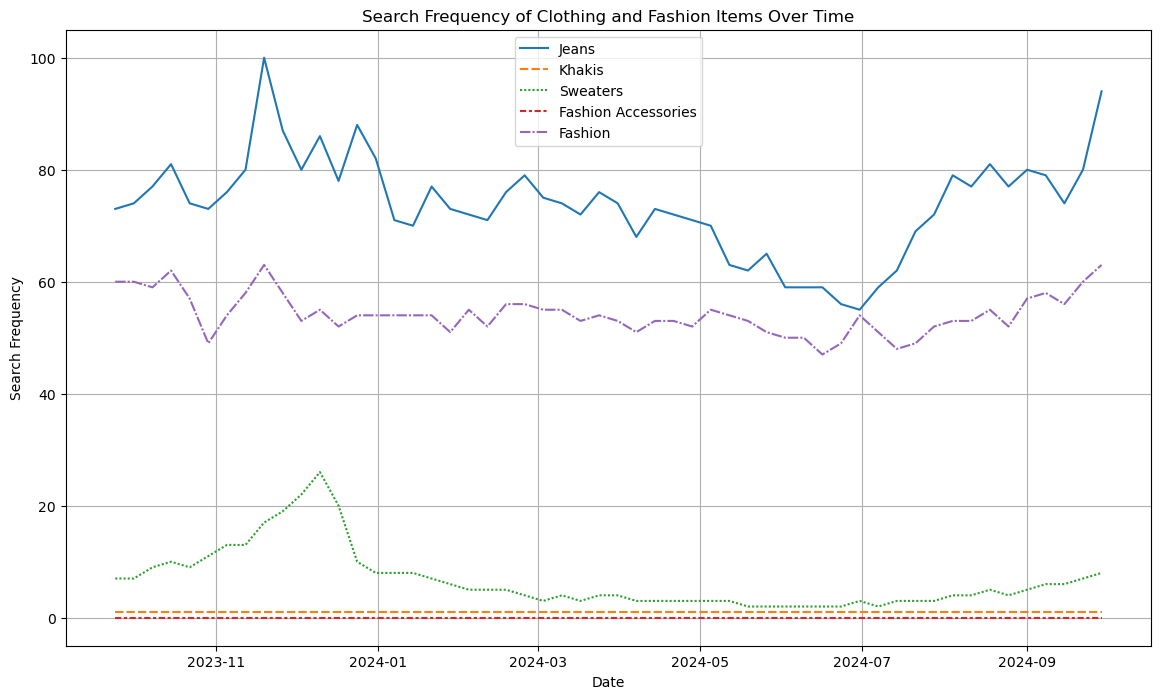

In [69]:
trends_data['date'] = pd.to_datetime(trends_data['date'])

# Set the date as the index (helps with time series plotting)
trends_data.set_index('date', inplace=True)

# Plot search frequency over time for different terms
plt.figure(figsize=(14, 8))
sns.lineplot(data=trends_data[['jeans', 'khakis', 'sweaters', 'fashion accessories', 'fashion']])
plt.title('Search Frequency of Clothing and Fashion Items Over Time')
plt.xlabel('Date')
plt.ylabel('Search Frequency')
plt.legend(labels=['Jeans', 'Khakis', 'Sweaters', 'Fashion Accessories', 'Fashion'])
plt.grid(True)
plt.show()

## Most Searched Terms Throughout the Year

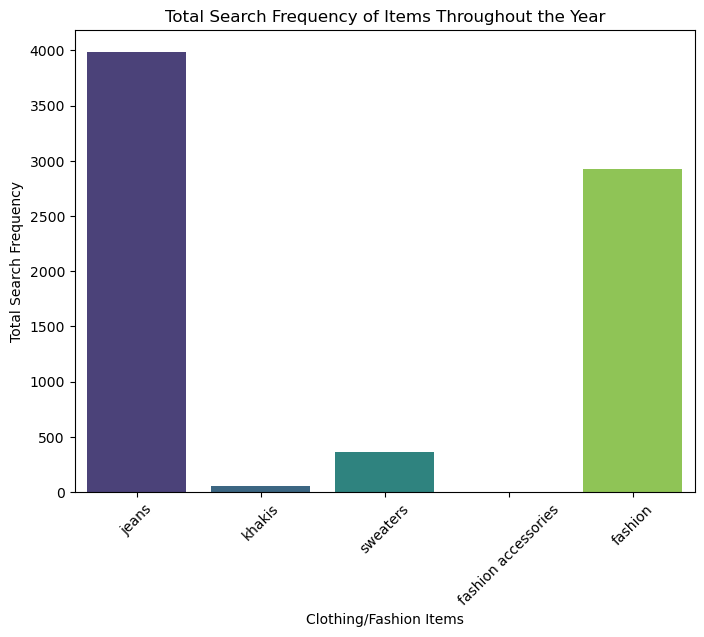

In [70]:
# Sum the values for each column to get total searches throughout the year
total_searches = trends_data[['jeans', 'khakis', 'sweaters', 'fashion accessories', 'fashion']].sum()

# Plot total searches for each item
plt.figure(figsize=(8, 6))
sns.barplot(x=total_searches.index, y=total_searches.values, palette='viridis')
plt.title('Total Search Frequency of Items Throughout the Year')
plt.xlabel('Clothing/Fashion Items')
plt.ylabel('Total Search Frequency')
plt.xticks(rotation=45)
plt.show()

# Trend Analysis of GAP, Banana Repulic and Old Navy Products

In [18]:
gap_keywords = ["Gap jeans", "Gap t-shirts", "Gap sweaters", "Gap chinos", "Gap hoodie", "Gap fashion", "Gap denim", "Gap outerwear"]
banana_republic_keywords = ["Banana Republic suits", "Banana Republic dresses", "Banana Republic casual wear", "Banana Republic fashion", "Banana Republic coats", "Banana Republic shoes"]
old_navy_keywords = ["Old Navy kids clothing", "Old Navy jeans", "Old Navy baby clothes", "Old Navy activewear", "Old Navy shorts", "Old Navy fashion", "Old Navy outerwear", "Old Navy sales"]

In [19]:
# Time periods for trends
timeframes = ['today 12-m', 'today 5-y', 'all']  # Last 12 months, last 5 years, and all available data

In [20]:
# Function to fetch Google Trends data in batches of 5 keywords
def fetch_trends_data_in_batches(keywords, timeframe):
    batch_size = 5  # Max keywords per request
    results = []

    for i in range(0, len(keywords), batch_size):
        keyword_batch = keywords[i:i+batch_size]  # Create batches of 5
        pytrends.build_payload(keyword_batch, cat=0, timeframe=timeframe, geo='US', gprop='')
        batch_data = pytrends.interest_over_time()
        if not batch_data.empty:
            results.append(batch_data)

    # Combine all batches into a single DataFrame
    combined_data = pd.concat(results, axis=1)
    combined_data = combined_data.drop('isPartial', axis=1, errors='ignore')  # Remove 'isPartial' column if it exists
    return combined_data

In [22]:
# Fetch data for each brand and timeframe
gap_trends_12m = fetch_trends_data_in_batches(gap_keywords, timeframes[0])
gap_trends_5y = fetch_trends_data_in_batches(gap_keywords, timeframes[1])
gap_trends_all = fetch_trends_data_in_batches(gap_keywords, timeframes[2])

banana_trends_12m = fetch_trends_data_in_batches(banana_republic_keywords, timeframes[0])
banana_trends_5y = fetch_trends_data_in_batches(banana_republic_keywords, timeframes[1])
banana_trends_all = fetch_trends_data_in_batches(banana_republic_keywords, timeframes[2])


old_navy_trends_12m = fetch_trends_data_in_batches(old_navy_keywords, timeframes[0])
old_navy_trends_5y = fetch_trends_data_in_batches(old_navy_keywords, timeframes[1])
old_navy_trends_all = fetch_trends_data_in_batches(old_navy_keywords, timeframes[2])

In [47]:
#creating an additional column that stores the sum of all the searches
gap_trends_12m['total_searches']=gap_trends_12m[:].sum(axis=1)
banana_trends_12m['total_searches']=banana_trends_12m[:].sum(axis=1)
old_navy_trends_12m['total_searches']=old_navy_trends_12m[:].sum(axis=1)

gap_trends_5y['total_searches']=gap_trends_5y[:].sum(axis=1)
banana_trends_5y['total_searches']=banana_trends_5y[:].sum(axis=1)
old_navy_trends_5y['total_searches']=old_navy_trends_5y[:].sum(axis=1)


gap_trends_all['total_searches']=gap_trends_all[:].sum(axis=1)
banana_trends_all['total_searches']=banana_trends_all[:].sum(axis=1)
old_navy_trends_all['total_searches']=old_navy_trends_all[:].sum(axis=1)


In [48]:
gap_trends_12m.head()

,Gap jeans,Gap t-shirts,Gap sweaters,Gap chinos,Gap hoodie,Gap fashion,Gap denim,Gap outerwear,total_searches
date,,,,,,,,,
2023-09-24,36,0,7,1,40,24,52,0,160
2023-10-01,36,1,7,0,42,26,45,0,157
2023-10-08,36,0,8,1,43,22,45,0,155
2023-10-15,38,0,7,1,41,26,45,0,158
2023-10-22,37,0,8,0,46,28,41,0,160


## Line plot for Gap search terms over the last 12 months

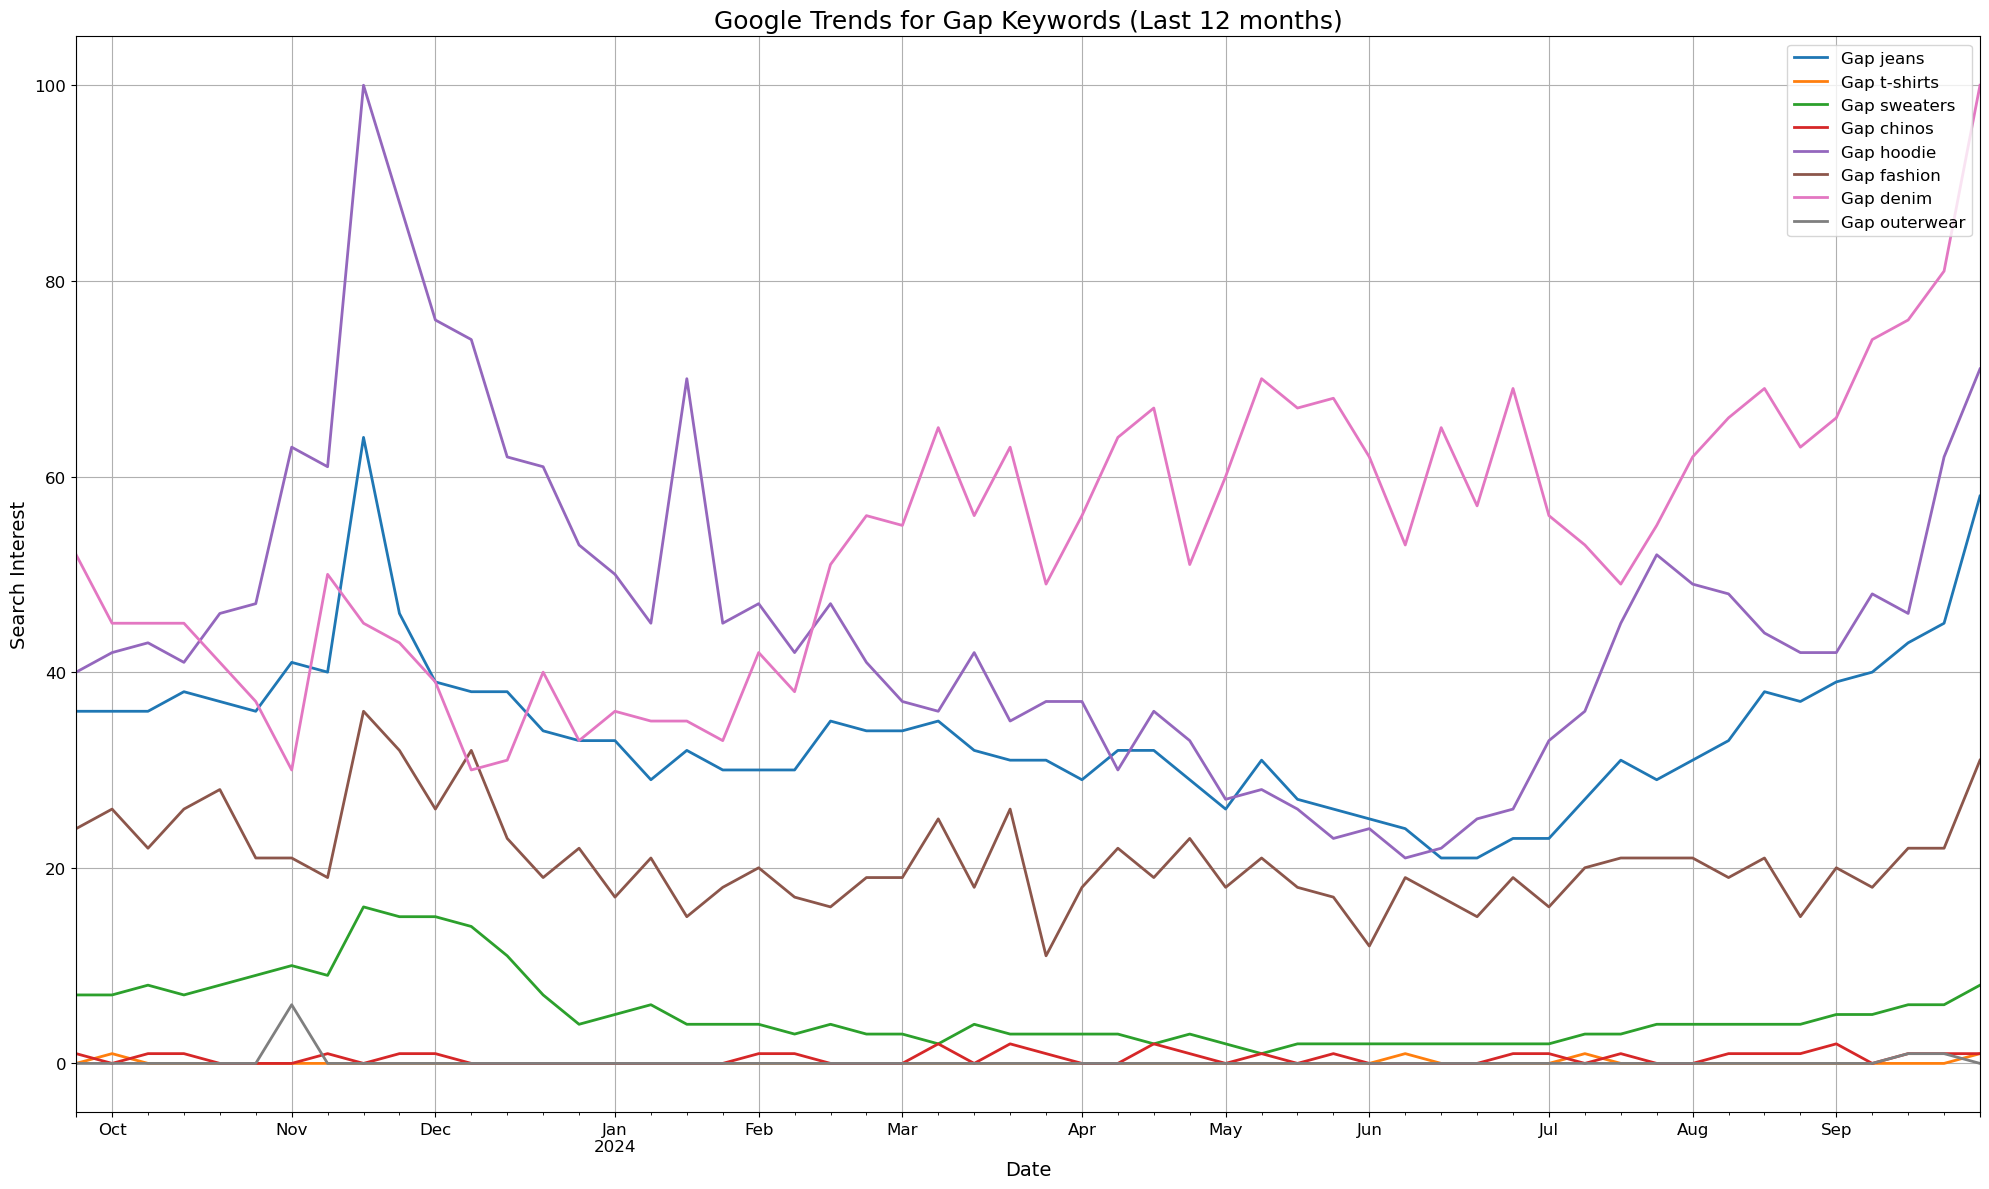

In [39]:
# Visualization 1
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)
gap_trends_12m.plot(ax=ax, title="Google Trends for Gap Keywords (Last 12 months)", linewidth=2)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Search Interest", fontsize=14)
ax.set_title("Google Trends for Gap Keywords (Last 12 months)", fontsize=18)
ax.legend(loc='upper right', fontsize=12)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig('gap_trends_plot_alternative.png', dpi=100, bbox_inches='tight')
plt.show()

## Comparing Gap, Banana Republic, and Old Navy trends over 5 years

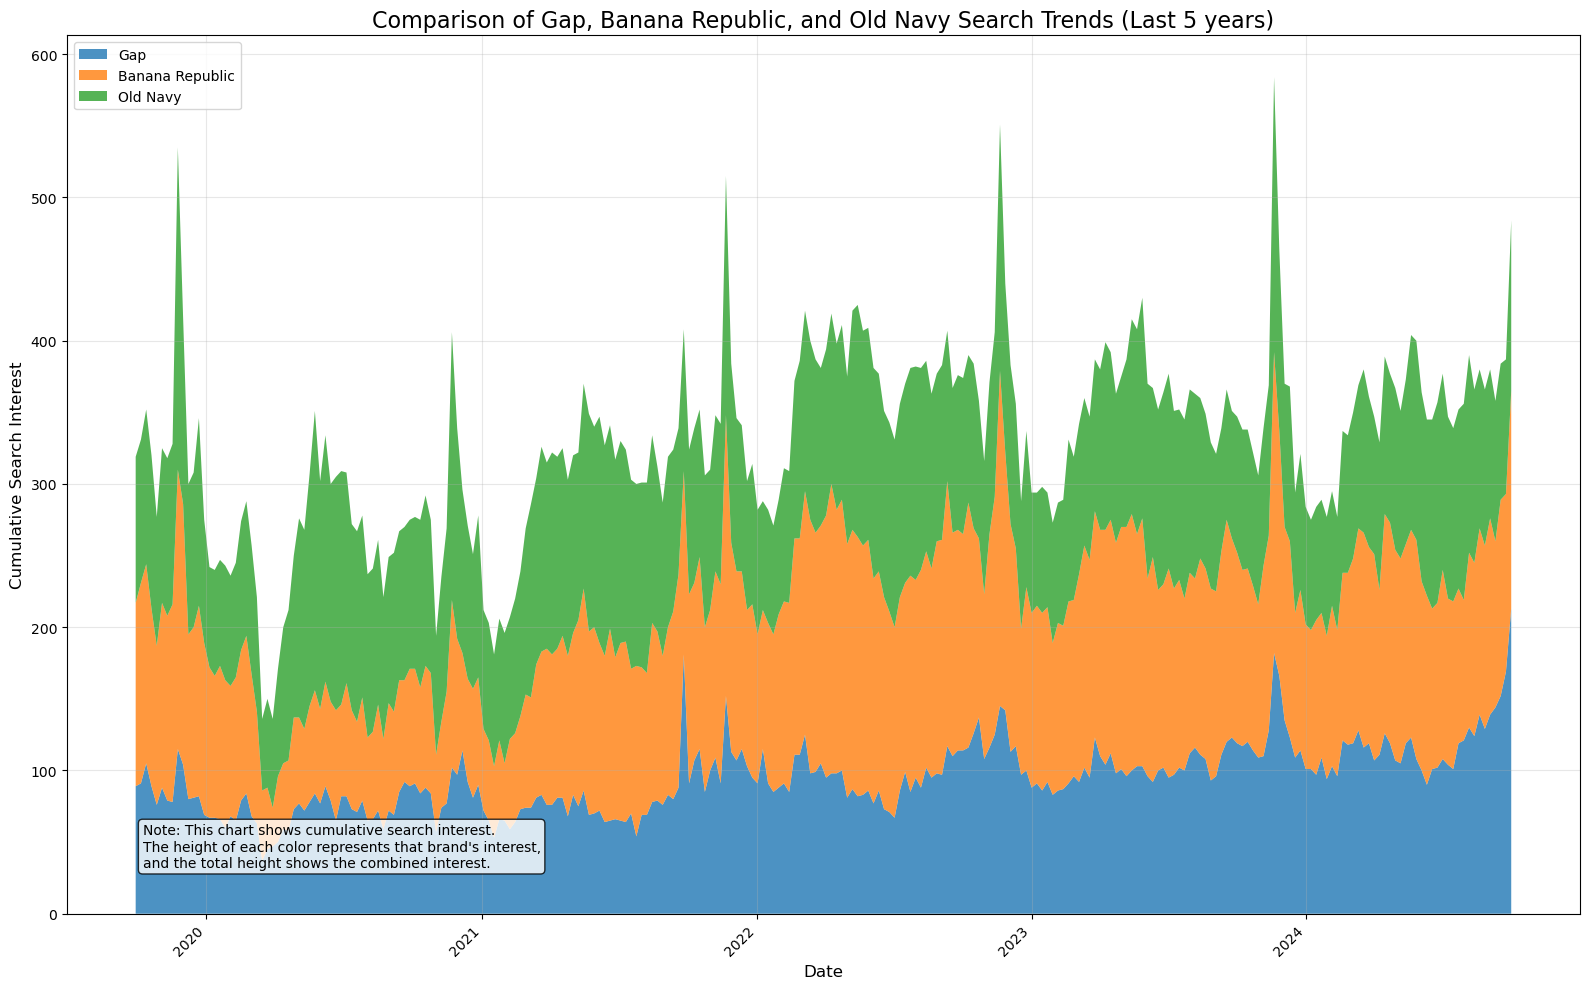

In [51]:
#Visualization 2 (1st Option)
# Combine the data into a single DataFrame
combined_df = pd.DataFrame({
    'Gap': gap_trends_5y['total_searches'],
    'Banana Republic': banana_trends_5y['total_searches'],
    'Old Navy': old_navy_trends_5y['total_searches']
})

# Create the stacked area chart
plt.figure(figsize=(16, 10))
ax = plt.stackplot(combined_df.index, 
                   combined_df['Gap'], 
                   combined_df['Banana Republic'], 
                   combined_df['Old Navy'],
                   labels=['Gap', 'Banana Republic', 'Old Navy'],
                   alpha=0.8)

plt.title("Comparison of Gap, Banana Republic, and Old Navy Search Trends (Last 5 years)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Search Interest", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

# Improve x-axis readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add a text annotation explaining the chart
plt.text(0.05, 0.05, "Note: This chart shows cumulative search interest.\nThe height of each color represents that brand's interest,\nand the total height shows the combined interest.", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

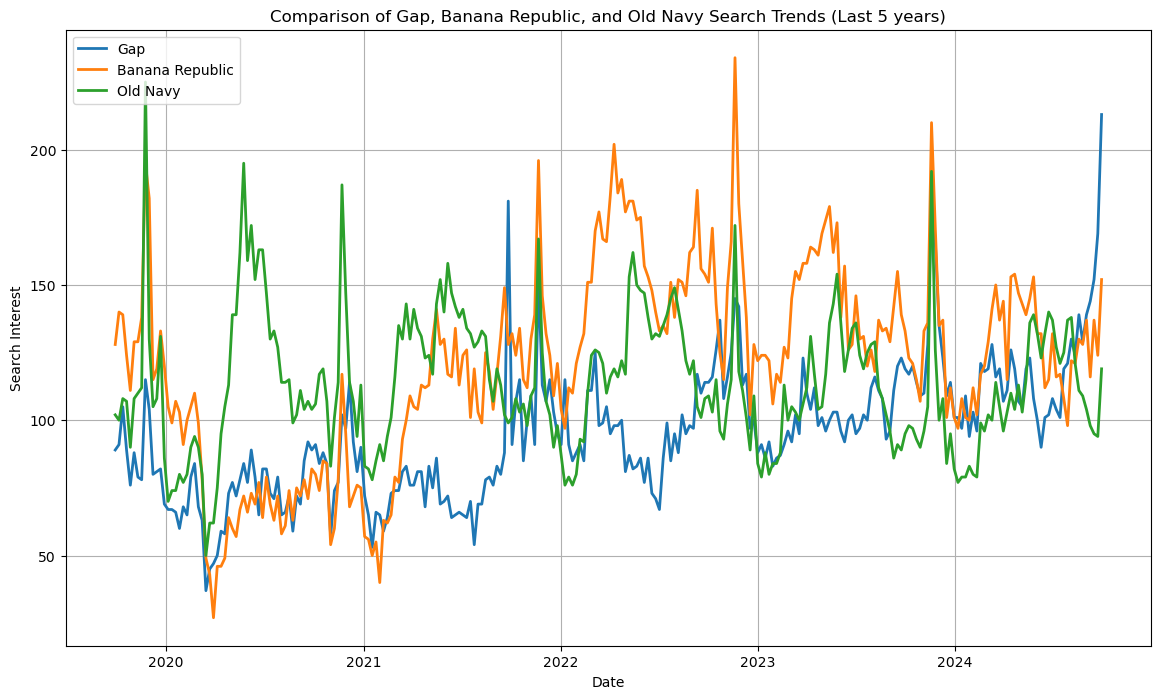

In [64]:
#Visualization 2 (2nd Option) 
plt.figure(figsize=(14, 8))
sns.lineplot(data=gap_trends_5y['total_searches'], palette="Set2", dashes=False, linewidth=2, label="Gap")
sns.lineplot(data=banana_trends_5y['total_searches'], palette="Set1", dashes=False, linewidth=2, label="Banana Republic")
sns.lineplot(data=old_navy_trends_5y['total_searches'], palette="Set3", dashes=False, linewidth=2, label="Old Navy")
plt.title("Comparison of Gap, Banana Republic, and Old Navy Search Trends (Last 5 years)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Heatmap for Gap, Old Navy, Banana Republic search terms across last 5 years

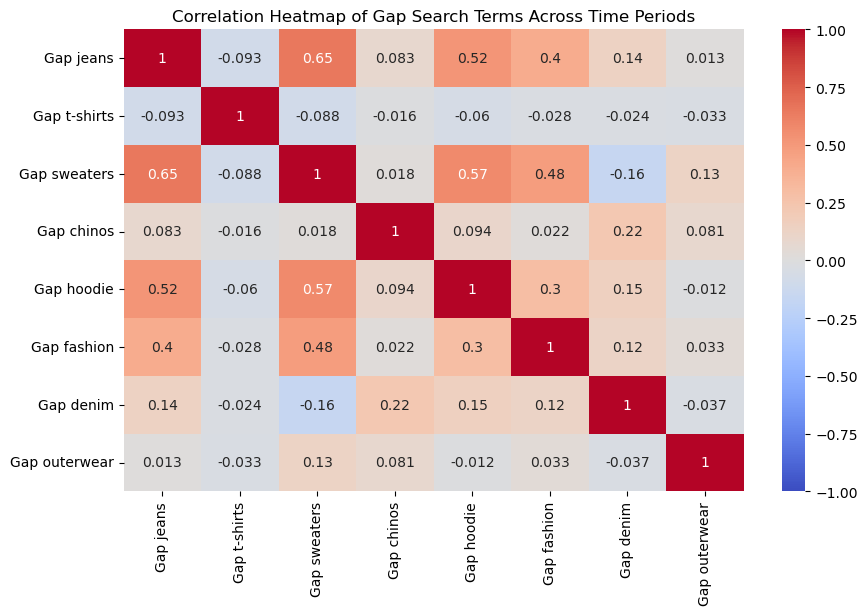

In [61]:
# Visualization 3
#For GAP
gap_combined_corr = gap_trends_5y.iloc[:,:-1].corr() #excluding the total_search column
plt.figure(figsize=(10, 6))
sns.heatmap(gap_combined_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Gap Search Terms Across Time Periods")
plt.show()

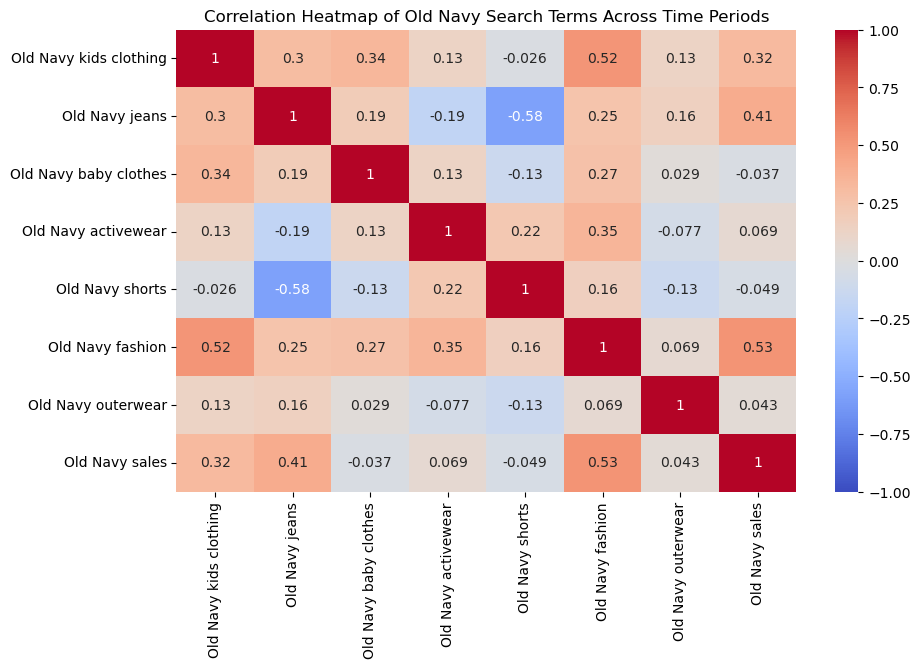

In [62]:
#For Old Navy
gap_combined_corr = old_navy_trends_5y.iloc[:,:-1].corr() #excluding the total_search column
plt.figure(figsize=(10, 6))
sns.heatmap(gap_combined_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Old Navy Search Terms Across Time Periods")
plt.show()

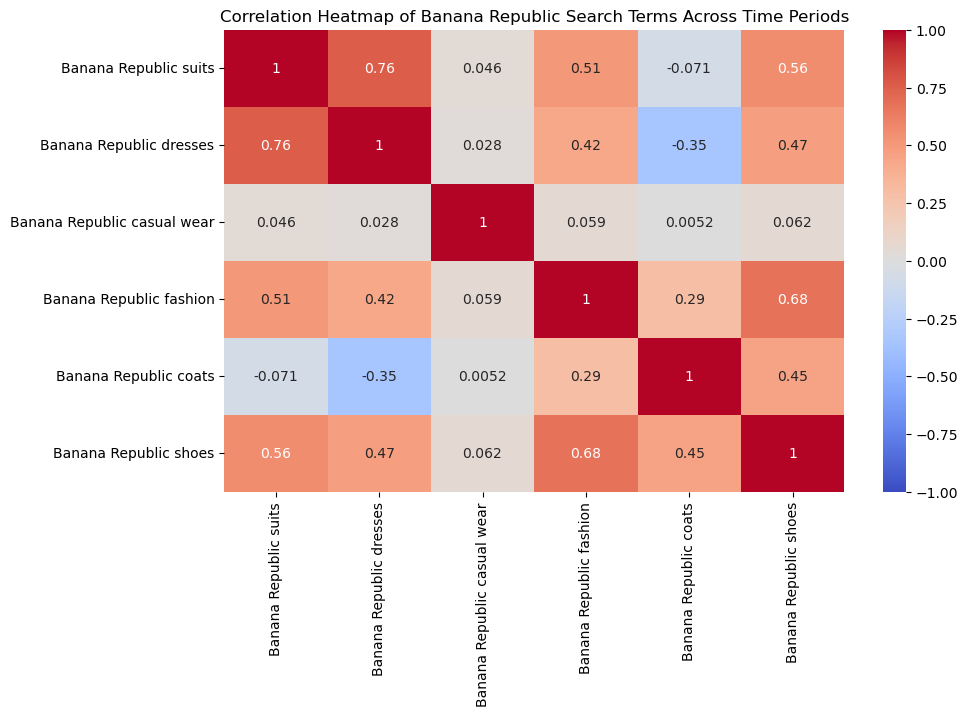

In [63]:
#For Banana Republic
gap_combined_corr = banana_trends_5y.iloc[:,:-1].corr() #excluding the total_search column
plt.figure(figsize=(10, 6))
sns.heatmap(gap_combined_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Banana Republic Search Terms Across Time Periods")
plt.show()

## Trend decomposition for Banana Republic in a 5 year window (Seasonality vs Trend for 'Banana Republic dresses')

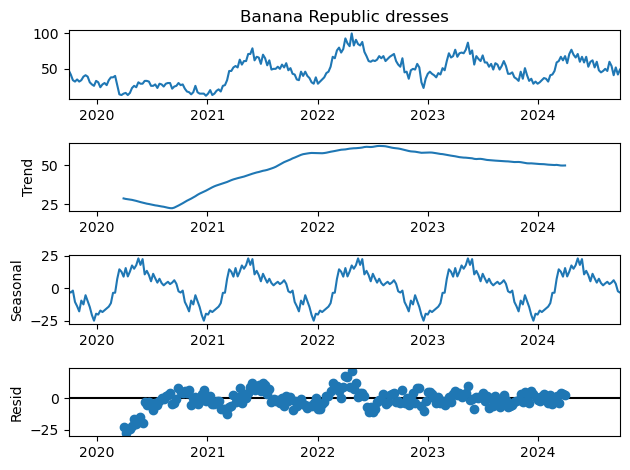

<Figure size 1500x800 with 0 Axes>

In [71]:
# Visualization 4
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose one of the time series
banana_dress_trend = banana_trends_5y['Banana Republic dresses'].dropna()
decomposition = seasonal_decompose(banana_dress_trend, period=52)
decomposition.plot()
plt.figure(figsize=(15, 8))
plt.suptitle('Trend Decomposition for "Banana Republic Dresses" (All Time)', fontsize=10)
plt.show()

**How to interpret the seasonal decomposition plot:**

1. Observed: This is the original time series data.

2. Trend: This shows the overall direction of the data over time, 
   smoothing out short-term fluctuations and seasonal effects.

3. Seasonal: This component represents repeating patterns or cycles within the data.
   With period=52, it's showing weekly seasonality over a year.

4. Residual: These are the remaining variations after accounting for trend and seasonality.
   It represents the "noise" or unexplained variation in the data.

**Key points for interpretation:**
- Trend: Look for overall increase, decrease, or stability over time.
- Seasonal: Observe repeating patterns and their magnitude.
- Residual: Check for any remaining patterns or if it looks random.

Large residuals or clear patterns in the residual plot may indicate that the 
decomposition hasn't captured all the systematic variation in the data.


**Now, let's break down how to read each component of the decomposition plot:**

1. Observed Component:
   - This is the top plot, showing the original time series data.
   - It represents the raw search interest for "Banana Republic dresses" over time.
   - Look for overall patterns, peaks, and troughs in the data.

2. Trend Component:
   - The second plot shows the underlying trend of the data.
   - It smooths out short-term fluctuations and seasonal effects.
   - Observe whether there's an overall increase, decrease, or stability in interest over time.
   - Any significant changes in direction in this plot indicate long-term shifts in popularity.

3. Seasonal Component:
   - The third plot displays repeating patterns or cycles within the data.
   - With `period=52`, it's showing weekly seasonality over a year.
   - Look for regular spikes or dips. For example, you might see higher interest during certain seasons (e.g., summer for dresses) or around holidays.
   - The magnitude of these seasonal effects indicates how much seasonality impacts the search interest.

4. Residual Component:
   - The bottom plot shows what's left after removing trend and seasonal effects.
   - It represents the "noise" or unexplained variation in the data.
   - Ideally, this should look random. If you see clear patterns here, it might indicate that the decomposition hasn't captured all systematic variation in the data.
   - Large spikes in the residual could indicate one-off events that affected search interest (e.g., a viral marketing campaign).

**Key Points for Interpretation:**

- Overall Trend: Is interest in Banana Republic dresses increasing, decreasing, or stable over time?
- Seasonality Strength: How significant are the seasonal patterns? Are there clear peaks at certain times of the year?
- Unusual Events: Look for any extremely high or low points in the residual plot, which might correspond to specific events.
- Model Fit: If the residual plot shows clear patterns, the decomposition might not be capturing all the structure in your data. You might need to consider other factors or a different period for seasonality.

## Bar plot to compare average search interest across brands (in 5 year window)

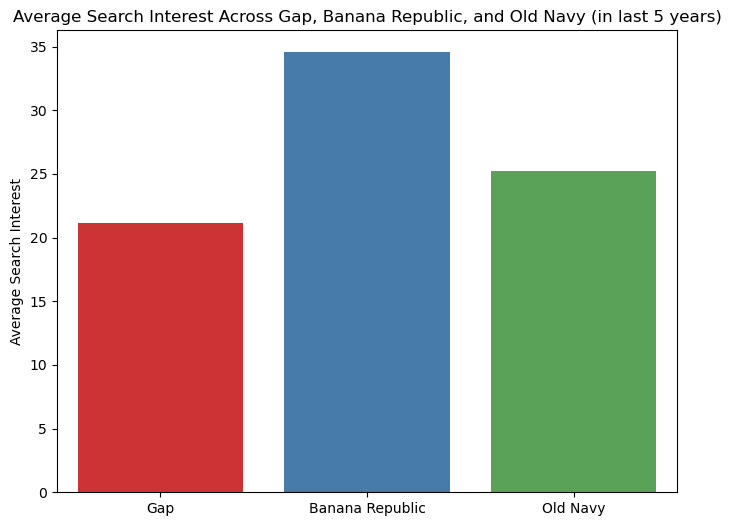

In [75]:
# Visualization 5
peak_values = {
    'Gap': gap_trends_5y.mean().mean(),
    'Banana Republic': banana_trends_5y.mean().mean(),
    'Old Navy': old_navy_trends_5y.mean().mean()
}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(peak_values.keys()), y=list(peak_values.values()), palette='Set1')
plt.title('Average Search Interest Across Gap, Banana Republic, and Old Navy (in last 5 years)')
plt.ylabel('Average Search Interest')
plt.show()